In [16]:

# Install tensorflow using the following command
# !pip install tensorflow==2.5.0

In [25]:
#Importing
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
from scipy import misc
from PIL import Image
plt.rcParams['figure.figsize'] = (10, 6)

In [21]:
if not tf.__version__ == '2.5.0':
    print(tf.__version__)
    raise ValueError('please upgrade to TensorFlow 2.5.0, or restart your Kernel (Kernel->Restart & Clear Output)')

In [20]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

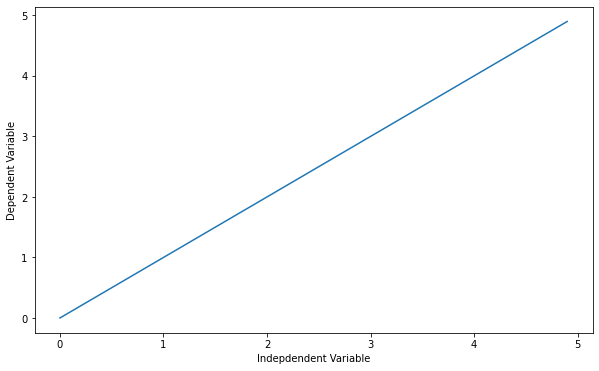

In [21]:
##You can adjust the slope and intercept to verify the changes in the graph
a = 1
b = 0

Y= a * X + b 

plt.plot(X, Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [36]:

# df = pd.read_csv("MY2022FuelConsumptionRatings.csv")
# df
# take a look at the dataset
# df.head()

In [1]:
import numpy as np

h = [2, 1, 0]
x = [3, 4, 5]
 

y = np.convolve(x, h)
y

array([ 6, 11, 14,  5,  0])

In [2]:
x = [6, 2]
h = [1, 2, 5, 4]

#now, because of the zero padding, the final dimension of the array is bigger

y = np.convolve(x, h, "full") 
y 

array([ 6, 14, 34, 34,  8])

In [3]:
# using the same padding
x = [6, 2]
h = [1, 2, 5, 4]
# it is same as zero padding, but with returns an ouput with the same length as max of x or h

y = np.convolve(x, h, "same")  
y  

array([ 6, 14, 34, 34])

In [4]:
# Visually understanding the operation with no padding (valid)
x = [6, 2]
h = [1, 2, 5, 4]

 # valid returns output of length max(x, h) - min(x, h) + 1, this is to ensure that values outside of the boundary
# of h will not be used in the calculation of the convolution in the next example we will understand why we used 
# the argument valid

y = np.convolve(x, h, "valid")  
y  

array([14, 34, 34])

In [5]:
from scipy import signal as sg

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1, 1]]

print('Without zero padding \n')
print('{0} \n'.format(sg.convolve( I, g, 'valid')))
# The 'valid' argument states that the output consists only of those elements 
# that do not rely on the zero-padding.

print('With zero padding \n')
print(sg.convolve( I, g))

Without zero padding 

[[248   4]
 [-28 236]
 [  2 -14]] 

With zero padding 

[[-255  248    4    3]
 [-212  -28  236    4]
 [-218    2  -14  230]]


In [6]:
I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230],]

g= [[-1,  1],
    [ 2,  3],]

print ('With zero padding \n')
print ('{0} \n'.format(sg.convolve( I, g, 'full')))
# The output is the full discrete linear convolution of the inputs. 
# It will use zero to complete the input matrix

print ('With zero padding_same_ \n')
print ('{0} \n'.format(sg.convolve( I, g, 'same')))
# The output is the full discrete linear convolution of the inputs. 
# It will use zero to complete the input matrix


print ('Without zero padding \n')
print (sg.convolve( I, g, 'valid'))
# The 'valid' argument states that the output consists only of those elements 
#that do not rely on the zero-padding.

With zero padding 

[[-255  248    4    3]
 [ 298  751  263   13]
 [ 206 1118  714  242]
 [ 436 1086 1108  690]] 

With zero padding_same_ 

[[-255  248    4]
 [ 298  751  263]
 [ 206 1118  714]] 

Without zero padding 

[[ 751  263]
 [1118  714]]


In [9]:
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))



In [22]:
input = tf.Variable(tf.random.normal([1, 10, 10, 1]))
filter = tf.Variable(tf.random.normal([3, 3, 1, 1]))
op = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='VALID')
op2 = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')

print("Input \n")
print('{0} \n'.format(input.numpy()))
print("Filter/Kernel \n")
print('{0} \n'.format(filter.numpy()))
print("Result/Feature Map with valid positions \n")
print(op.numpy())
print('\n')
print("Result/Feature Map with padding \n")
print(op2.numpy())

Input 

[[[[-0.7754665 ]
   [-0.69352525]
   [ 1.8745735 ]
   [ 0.2176765 ]
   [-0.94423336]
   [-1.5733237 ]
   [-1.1172627 ]
   [ 0.03399584]
   [-0.34674546]
   [ 0.02516864]]

  [[-0.7966152 ]
   [-0.5840901 ]
   [-0.34850425]
   [ 1.8911564 ]
   [-0.6980202 ]
   [ 0.04599928]
   [ 0.928772  ]
   [ 1.0368159 ]
   [ 0.92857915]
   [ 0.06638741]]

  [[-1.7601851 ]
   [ 0.05852397]
   [ 0.5836977 ]
   [-0.51683855]
   [ 0.17798871]
   [ 0.8442537 ]
   [-1.1260836 ]
   [-0.26109207]
   [-0.6020146 ]
   [ 0.3628204 ]]

  [[-0.03203655]
   [-1.1675986 ]
   [-1.0495933 ]
   [-1.2667263 ]
   [ 0.80405426]
   [ 0.59987277]
   [ 0.5042987 ]
   [ 1.5931358 ]
   [ 0.7845057 ]
   [ 0.7099104 ]]

  [[ 0.046532  ]
   [ 0.94159687]
   [-0.19173782]
   [ 0.60233504]
   [ 0.92230374]
   [-0.8594263 ]
   [-1.3856007 ]
   [-0.24437322]
   [-0.45346224]
   [-0.4420038 ]]

  [[-1.2718554 ]
   [ 0.8956134 ]
   [ 1.0050269 ]
   [ 1.3313459 ]
   [-0.6359944 ]
   [ 0.44775978]
   [ 0.53812647]
   [ 0.572896


 Original type: <PIL.Image.Image image mode=L size=1456x2592 at 0x7FA9053E40D0> 


After conversion to numerical representation: 

 array([[242, 242, 242, ..., 225, 225, 225],
       [241, 241, 241, ..., 226, 226, 226],
       [241, 241, 241, ..., 226, 226, 226],
       ...,
       [112, 113, 112, ...,  12,  10,  11],
       [111, 113, 114, ...,  13,  10,  11],
       [111, 110, 112, ...,  10,  10,  15]], dtype=uint8)

 Input image converted to gray scale: 



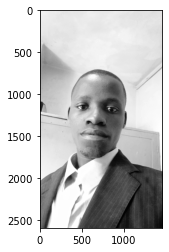

In [26]:
im = Image.open('ml2.jpg')  # type here your image's name

image_gr = im.convert("L")
# convert("L") translate color images into black and white
# uses the ITU-R 601-2 Luma transform (there are several 
# ways to convert an image to grey scale)
print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8) 
arr = np.asarray(image_gr) 
print("After conversion to numerical representation: \n\n %r" % arr) 
### Activating matplotlib for Ipython
%matplotlib inline
### Plot image
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)